In [1]:
library(tidyverse)
library(reshape2)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




In [2]:
housing = read.csv('housing.csv')

In [3]:
head(housing)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


In [4]:
summary(housing)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
                                                                    
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 647.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   

In [5]:
par(mfrow=c(2,5)) #Sets up the plotting area 2 Y and 5 X

In [6]:
colnames(housing) #Utilizes the housing data for the plots

[1] "longitude"          "latitude"           "housing_median_age"
 [4] "total_rooms"        "total_bedrooms"     "population"        
 [7] "households"         "median_income"      "median_house_value"
[10] "ocean_proximity"

Using ocean_proximity as id variables

Warning message:
"Removed 207 rows containing non-finite outside the scale range (`stat_bin()`)."


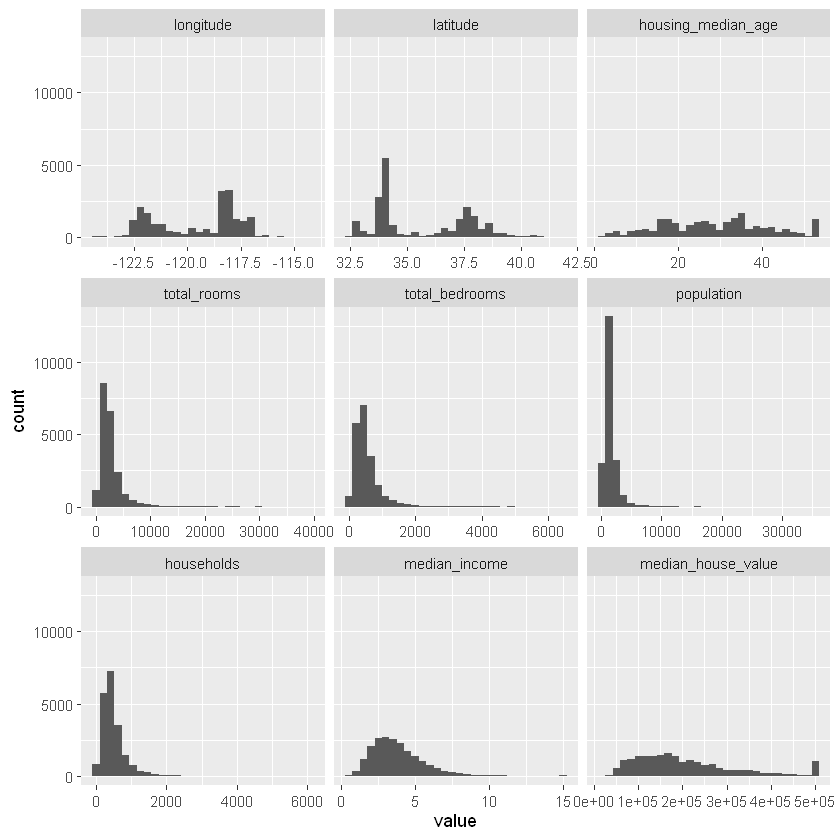

In [7]:
ggplot(data = melt(housing), mapping = aes(x = value)) + 
    geom_histogram(bins = 30) + facet_wrap(~variable, scales = 'free_x')

#Creates the plots via the columns we called in the prior step

In [8]:
housing$total_bedrooms[is.na(housing$total_bedrooms)] = median(housing$total_bedrooms , na.rm = TRUE)

#Targets the NA's in the total_bedroom data and fills with the median value of all non NA values

In [9]:
housing$mean_bedrooms = housing$total_bedrooms/housing$households #creates a new column indicating the mean number of bedrooms by dividing the total number of bedrooms by the total amount of households
housing$mean_rooms = housing$total_rooms/housing$households #creates a new column indicating the mean number of rooms by dividing the total number of rooms by the total amount of households

drops = c('total_bedrooms', 'total_rooms') #indicates the columns we want to replace with the above new columns

housing = housing[ , !(names(housing) %in% drops)] #drops the columns via the variable above

In [10]:
head(housing)

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,mean_bedrooms,mean_rooms
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,-122.23,37.88,41,322,126,8.3252,452600,NEAR BAY,1.0238095,6.984127
2,-122.22,37.86,21,2401,1138,8.3014,358500,NEAR BAY,0.9718805,6.238137
3,-122.24,37.85,52,496,177,7.2574,352100,NEAR BAY,1.0734463,8.288136
4,-122.25,37.85,52,558,219,5.6431,341300,NEAR BAY,1.0730594,5.817352
5,-122.25,37.85,52,565,259,3.8462,342200,NEAR BAY,1.0810811,6.281853
6,-122.25,37.85,52,413,193,4.0368,269700,NEAR BAY,1.1036269,4.761658


In [11]:
summary(housing)

   longitude         latitude     housing_median_age   population   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    3  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.:  787  
 Median :-118.5   Median :34.26   Median :29.00      Median : 1166  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 1425  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 1725  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :35682  
   households     median_income     median_house_value ocean_proximity   
 Min.   :   1.0   Min.   : 0.4999   Min.   : 14999     Length:20640      
 1st Qu.: 280.0   1st Qu.: 2.5634   1st Qu.:119600     Class :character  
 Median : 409.0   Median : 3.5348   Median :179700     Mode  :character  
 Mean   : 499.5   Mean   : 3.8707   Mean   :206856                       
 3rd Qu.: 605.0   3rd Qu.: 4.7432   3rd Qu.:264725                       
 Max.   :6082.0   Max.   :15.0001   Max.   :500001                       

In [12]:
categories = unique(housing$ocean_proximity)
#split the categories off
cat_housing = data.frame(ocean_proximity = housing$ocean_proximity)

In [13]:
for(cat in categories){
    cat_housing[,cat] = rep(0, times= nrow(cat_housing))
} #Creates a for loop that runs through each element of cat_housing and assigns a new columns for each unique value
head(cat_housing) #see the new columns on the right

,ocean_proximity,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NEAR BAY,0,0,0,0,0
2,NEAR BAY,0,0,0,0,0
3,NEAR BAY,0,0,0,0,0
4,NEAR BAY,0,0,0,0,0
5,NEAR BAY,0,0,0,0,0
6,NEAR BAY,0,0,0,0,0


In [14]:
for(i in 1:length(cat_housing$ocean_proximity)){
    cat = as.character(cat_housing$ocean_proximity[i])
    cat_housing[,cat][i] = 1
}

head(cat_housing)
#assigns each element of ocean_proximity a binary 1 for each column created in the previous step if true, if not true it will remain a 0

,ocean_proximity,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NEAR BAY,1,0,0,0,0
2,NEAR BAY,1,0,0,0,0
3,NEAR BAY,1,0,0,0,0
4,NEAR BAY,1,0,0,0,0
5,NEAR BAY,1,0,0,0,0
6,NEAR BAY,1,0,0,0,0


In [15]:
cat_columns = names(cat_housing)
keep_columns = cat_columns[cat_columns != 'ocean_proximity']
cat_housing = select(cat_housing,one_of(keep_columns))
#Removes ocean_proximity from the cat_housing df
tail(cat_housing) #shows the last 5 of the df

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20635,0,0,1,0,0
20636,0,0,1,0,0
20637,0,0,1,0,0
20638,0,0,1,0,0
20639,0,0,1,0,0
20640,0,0,1,0,0


In [16]:
colnames(housing)

[1] "longitude"          "latitude"           "housing_median_age"
 [4] "population"         "households"         "median_income"     
 [7] "median_house_value" "ocean_proximity"    "mean_bedrooms"     
[10] "mean_rooms"

In [17]:
drops = c('ocean_proximity','median_house_value')
housing_num =  housing[ , !(names(housing) %in% drops)] #creates a new df minus ocean_proximity and median_house_value

In [18]:
head(housing_num)

,longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-122.23,37.88,41,322,126,8.3252,1.0238095,6.984127
2,-122.22,37.86,21,2401,1138,8.3014,0.9718805,6.238137
3,-122.24,37.85,52,496,177,7.2574,1.0734463,8.288136
4,-122.25,37.85,52,558,219,5.6431,1.0730594,5.817352
5,-122.25,37.85,52,565,259,3.8462,1.0810811,6.281853
6,-122.25,37.85,52,413,193,4.0368,1.1036269,4.761658


In [19]:
scaled_housing_num = scale(housing_num) #creates a new df with the variables selected above but scaled

In [20]:
head(scaled_housing_num)

longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms
-1.327803,1.052523,0.9821189,-0.9744050,-0.9770092,2.34470896,-0.148510661,0.6285442
-1.322812,1.043159,-0.6070042,0.8614180,1.6699206,2.33218146,-0.248535936,0.3270334
-1.332794,1.038478,1.8561366,-0.8207575,-0.8436165,1.78265622,-0.052900657,1.1555925
-1.337785,1.038478,1.8561366,-0.7660095,-0.7337637,0.93294491,-0.053646030,0.1569623
-1.337785,1.038478,1.8561366,-0.7598283,-0.6291419,-0.01288068,-0.038194658,0.3447024
-1.337785,1.038478,1.8561366,-0.8940491,-0.8017678,0.08744452,0.005232996,-0.2697231


In [21]:
cleaned_housing = cbind(cat_housing, scaled_housing_num, median_house_value=housing$median_house_value)

#combines all data frames created up to this point

In [22]:
head(cleaned_housing)

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms,median_house_value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,-1.327803,1.052523,0.9821189,-0.9744050,-0.9770092,2.34470896,-0.148510661,0.6285442,452600
2,1,0,0,0,0,-1.322812,1.043159,-0.6070042,0.8614180,1.6699206,2.33218146,-0.248535936,0.3270334,358500
3,1,0,0,0,0,-1.332794,1.038478,1.8561366,-0.8207575,-0.8436165,1.78265622,-0.052900657,1.1555925,352100
4,1,0,0,0,0,-1.337785,1.038478,1.8561366,-0.7660095,-0.7337637,0.93294491,-0.053646030,0.1569623,341300
5,1,0,0,0,0,-1.337785,1.038478,1.8561366,-0.7598283,-0.6291419,-0.01288068,-0.038194658,0.3447024,342200
6,1,0,0,0,0,-1.337785,1.038478,1.8561366,-0.8940491,-0.8017678,0.08744452,0.005232996,-0.2697231,269700


In [23]:
set.seed(1738) # Set a random seed so that same sample can be reproduced in future runs

sample = sample.int(n = nrow(cleaned_housing), size = floor(.8*nrow(cleaned_housing)), replace = F)
train = cleaned_housing[sample, ] #just the samples
test  = cleaned_housing[-sample, ] #everything but the samples

In [24]:
head(train)

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms,median_house_value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15797,1,0,0,0,0,-1.4226356,0.9963418,1.8561366,0.7360275,1.254049198,-0.7002610,-0.09402939,-0.71339265,250000
11425,0,1,0,0,0,0.7984423,-0.8997679,-0.2891796,0.1938460,-0.006642643,1.0257957,-0.26800948,0.46743428,286100
9208,0,0,1,0,0,-0.1399007,0.6873461,-1.6399342,-0.8940491,-0.924698320,-0.2609040,0.09587571,0.09790468,80700
8778,0,1,0,0,0,0.6287420,-0.8623139,0.5053819,-0.0454556,0.079670283,-0.3281734,-0.07443967,-0.44792541,254700
18375,0,1,0,0,0,-1.1431292,0.7482089,-0.3686357,0.4508082,0.398766559,1.0631150,-0.14119530,0.49424219,271400
19571,0,0,1,0,0,-0.6889312,0.9167520,1.1410312,-0.4975679,-0.438207278,-1.0654005,-0.06673316,-0.29391335,81500


In [25]:
nrow(train) + nrow(test) == nrow(cleaned_housing)

#ensures that we split our training and testing data accordingly

[1] TRUE

In [26]:
library('boot')

#importing boot

In [27]:
?cv.glm #note the K option for K fold cross validation

cv.glm {boot},R Documentation
data,"A matrix or data frame containing the data. The rows should be cases and the columns correspond to variables, one of which is the response."
glmfit,"An object of class ""glm"" containing the results of a generalized linear model fitted to data."
cost,A function of two vector arguments specifying the cost function for the cross-validation. The first argument to cost should correspond to the observed responses and the second argument should correspond to the predicted or fitted responses from the generalized linear model. cost must return a non-negative scalar value. The default is the average squared error function.
K,The number of groups into which the data should be split to estimate the cross-validation prediction error. The value of K must be such that all groups are of approximately equal size. If the supplied value of K does not satisfy this criterion then it will be set to the closest integer which does and a warning is generated specifying the value of K used. The default is to set K equal to the number of observations in data which gives the usual leave-one-out cross-validation.
call,The original call to cv.glm.
K,The value of K used for the K-fold cross validation.
delta,A vector of length two. The first component is the raw cross-validation estimate of prediction error. The second component is the adjusted cross-validation estimate. The adjustment is designed to compensate for the bias introduced by not using leave-one-out cross-validation.
seed,The value of .Random.seed when cv.glm was called.


In [28]:
glm_house = glm(median_house_value~median_income+mean_rooms+population, data=cleaned_housing)
k_fold_cv_error = cv.glm(cleaned_housing , glm_house, K=5)

#modelling median_house_value based on median income, mean rooms, and population

In [29]:
k_fold_cv_error$delta

#k fold cross validation

[1] 6993810248 6983982760

In [30]:
glm_cv_rmse = sqrt(k_fold_cv_error$delta)[1]
glm_cv_rmse #off by about $83,000... it is a start

[1] 83629

In [31]:
names(glm_house) #what parts of the model are callable?

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"

In [32]:
glm_house$coefficients

(Intercept) median_income    mean_rooms    population 
   206855.817     82608.959     -9755.442     -3948.293

In [33]:
library('randomForest')

#calling randomForest library

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




In [34]:
?randomForest

#details on randomForest

randomForest {randomForest},R Documentation
data,an optional data frame containing the variables in the model. By default the variables are taken from the environment which randomForest is called from.
subset,"an index vector indicating which rows should be used. (NOTE: If given, this argument must be named.)"
na.action,"A function to specify the action to be taken if NAs are found. (NOTE: If given, this argument must be named.)"
"x, formula","a data frame or a matrix of predictors, or a formula describing the model to be fitted (for the print method, an randomForest object)."
y,"A response vector. If a factor, classification is assumed, otherwise regression is assumed. If omitted, randomForest will run in unsupervised mode."
xtest,a data frame or matrix (like x) containing predictors for the test set.
ytest,response for the test set.
ntree,"Number of trees to grow. This should not be set to too small a number, to ensure that every input row gets predicted at least a few times."
mtry,Number of variables randomly sampled as candidates at each split. Note that the default values are different for classification (sqrt(p) where p is number of variables in x) and regression (p/3)
weights,A vector of length same as y that are positive weights used only in sampling data to grow each tree (not used in any other calculation)


In [35]:
names(train)

[1] "NEAR BAY"           "<1H OCEAN"          "INLAND"            
 [4] "NEAR OCEAN"         "ISLAND"             "longitude"         
 [7] "latitude"           "housing_median_age" "population"        
[10] "households"         "median_income"      "mean_bedrooms"     
[13] "mean_rooms"         "median_house_value"

In [36]:
set.seed(1738)

train_y = train[,'median_house_value']
train_x = train[, names(train) !='median_house_value']

head(train_y)
head(train_x)

#sepearating out the median house value from the predictors

[1] 250000 286100  80700 254700 271400  81500

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15797,1,0,0,0,0,-1.4226356,0.9963418,1.8561366,0.7360275,1.254049198,-0.7002610,-0.09402939,-0.71339265
11425,0,1,0,0,0,0.7984423,-0.8997679,-0.2891796,0.1938460,-0.006642643,1.0257957,-0.26800948,0.46743428
9208,0,0,1,0,0,-0.1399007,0.6873461,-1.6399342,-0.8940491,-0.924698320,-0.2609040,0.09587571,0.09790468
8778,0,1,0,0,0,0.6287420,-0.8623139,0.5053819,-0.0454556,0.079670283,-0.3281734,-0.07443967,-0.44792541
18375,0,1,0,0,0,-1.1431292,0.7482089,-0.3686357,0.4508082,0.398766559,1.0631150,-0.14119530,0.49424219
19571,0,0,1,0,0,-0.6889312,0.9167520,1.1410312,-0.4975679,-0.438207278,-1.0654005,-0.06673316,-0.29391335


In [37]:
rf_model = randomForest(train_x, y = train_y , ntree = 1000, importance = TRUE)

#sets the predictor frame and response frame and spefcifies to plant 500 random trees

In [38]:
names(rf_model)

[1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"

In [39]:
rf_model$importance

#allows us to call the importance statistics as stated in line 37

,%IncMSE,IncNodePurity
NEAR BAY,448159824,1.244783e+12
<1H OCEAN,1587237955,4.170679e+12
INLAND,4000134179,3.013758e+13
NEAR OCEAN,538058200,2.290545e+12
ISLAND,1278356,6.546797e+10
longitude,6832815667,2.586942e+13
latitude,5684832779,2.292644e+13
housing_median_age,1086350648,9.642429e+12
population,1057630327,7.398039e+12
households,1190823771,7.923832e+12


In [40]:
oob_prediction = predict(rf_model) #leaving out a data source forces OOB predictions

In [41]:
train_mse = mean(as.numeric((oob_prediction - train_y)^2))
oob_rmse = sqrt(train_mse)
oob_rmse

[1] 49009.92

In [42]:
test_y = test[,'median_house_value']
test_x = test[, names(test) !='median_house_value']


y_pred = predict(rf_model , test_x)
test_mse = mean(((y_pred - test_y)^2))
test_rmse = sqrt(test_mse)
test_rmse

[1] 47612.87